In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

ModuleNotFoundError: No module named 'pandas'

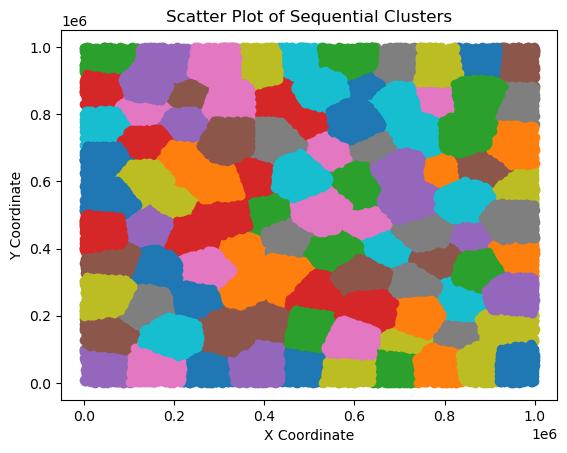

In [67]:
data = pd.read_csv('sequential_clusters.txt')
fig, ax = plt.subplots()
for cluster in data['cluster_id'].unique():
    cluster_data = data[data['cluster_id'] == cluster]
    ax.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster}')
# ax.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Scatter Plot of Sequential Clusters')
plt.show()

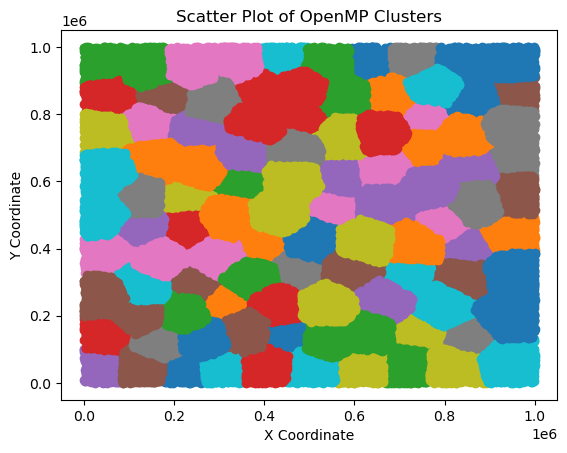

In [68]:
data = pd.read_csv('parallel_clusters.txt')
fig, ax = plt.subplots()
for cluster in data['cluster_id'].unique():
    cluster_data = data[data['cluster_id'] == cluster]
    ax.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster}')
# ax.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Scatter Plot of OpenMP Clusters')
plt.show()

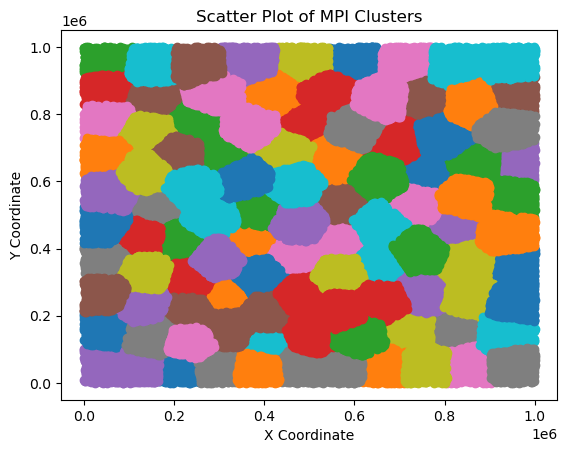

In [69]:
data = pd.read_csv('MPI_clusters.txt')
fig, ax = plt.subplots()
for cluster in data['cluster_id'].unique():
    cluster_data = data[data['cluster_id'] == cluster]
    ax.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster}')
# ax.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Scatter Plot of MPI Clusters')
plt.show()

In [80]:
# number_of_points = 50000 
# number_of_clusters = 100
# number_of_iterations = 100
# number_of_threads_or_processes = 10

In [65]:
def parse_log_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    init_time = float(lines[0].strip().split()[-2])
    iters_times = [float(line.strip().split()[-2]) for line in lines[1:-2]]
    total_time = float(lines[-2].strip().split()[-2])
    avg_time = float(lines[-1].strip().split()[-2])
    
    return init_time, iters_times, total_time, avg_time

# File paths
number_of_points = 50000
number_of_clusters = 100
number_of_iterations = 100
number_of_threads_or_processes = 10
address_prefix = 'outputs/method_comparison/'
mpi_file = f'{address_prefix}mpi_{number_of_points}_{number_of_clusters}_{number_of_iterations}_{number_of_threads_or_processes}.txt'
openmp_file = f'{address_prefix}openmp_{number_of_points}_{number_of_clusters}_{number_of_iterations}_{number_of_threads_or_processes}.txt'
sequential_file = f'{address_prefix}sequential_{number_of_points}_{number_of_clusters}_{number_of_iterations}.txt'

# Parsing the log files
mpi_init, mpi_iters, mpi_total, mpi_avg = parse_log_file(mpi_file)
openmp_init, openmp_iters, openmp_total, openmp_avg = parse_log_file(openmp_file)
seq_init, seq_iters, seq_total, seq_avg = parse_log_file(sequential_file)

In [63]:
openmp_init

1.09673e-05

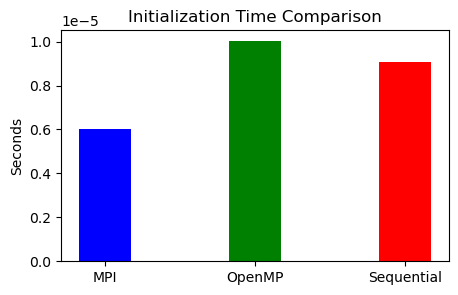

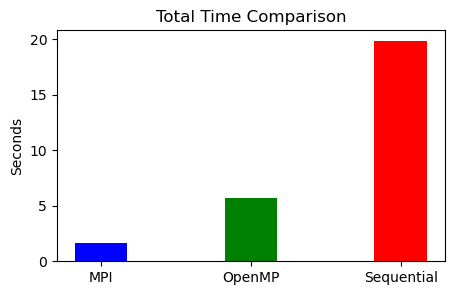

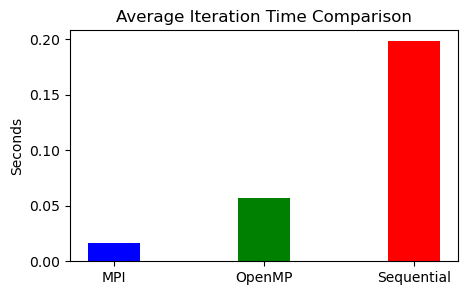

In [66]:
# Data setup
labels = ['MPI', 'OpenMP', 'Sequential']
init_times = [mpi_init, openmp_init, seq_init]
total_times = [mpi_total, openmp_total, seq_total]
avg_times = [mpi_avg, openmp_avg, seq_avg]
colors = ['b', 'g', 'r']
width = 0.35  # the width of the bars

# Initialization time bar chart
plt.figure(figsize=(5, 3))
plt.bar(labels, init_times, color=colors, width=width)
plt.title('Initialization Time Comparison')
plt.ylabel('Seconds')
plt.show()

# Total time bar chart
plt.figure(figsize=(5, 3))
plt.bar(labels, total_times, color=colors, width=width)
plt.title('Total Time Comparison')
plt.ylabel('Seconds')
plt.show()

# Average iteration time bar chart
plt.figure(figsize=(5, 3))
plt.bar(labels, avg_times, color=colors, width=width)
plt.title('Average Iteration Time Comparison')
plt.ylabel('Seconds')
plt.show()


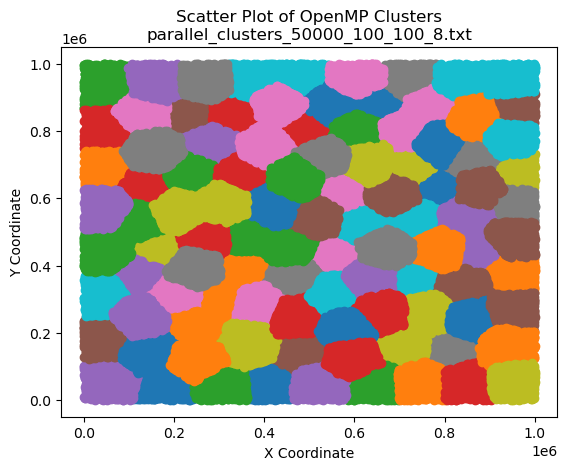

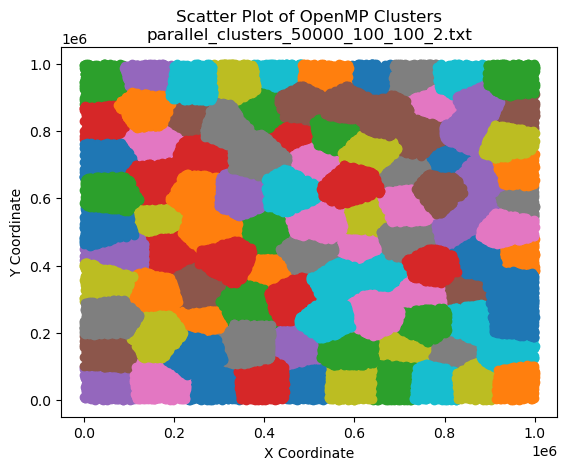

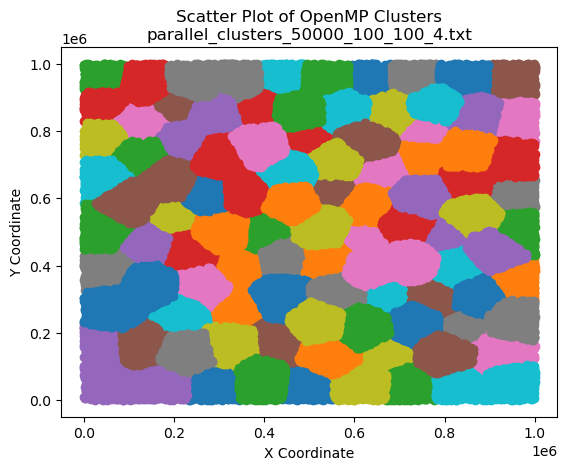

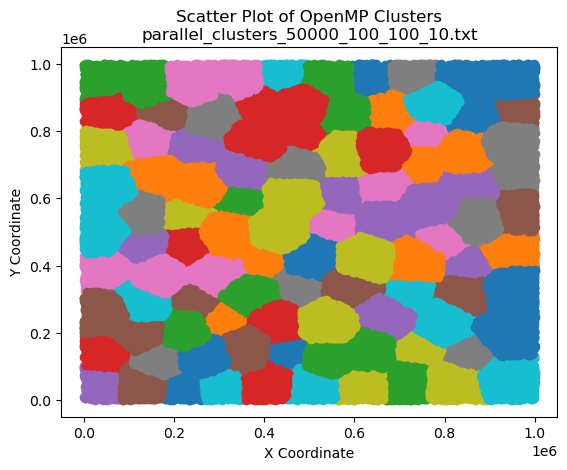

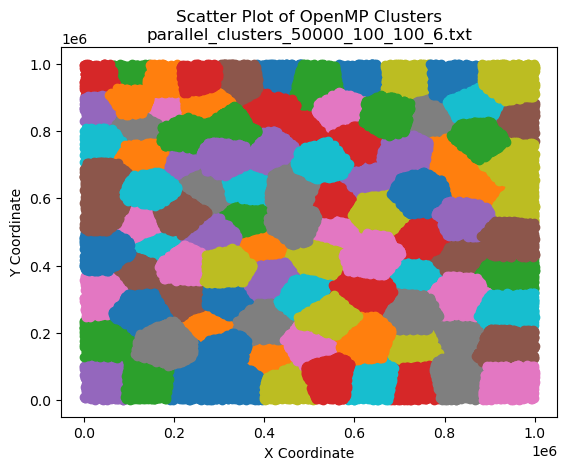

In [79]:
instances_dir = 'outputs/sanity_checks/'
parallel_instances = os.listdir(instances_dir)
for instance in parallel_instances:
    if 'parallel' not in instance:
        continue
    parts = instance.split('.')[0].split('_')
    file_number_of_points = int(parts[2])
    file_number_of_clusters = int(parts[3])
    file_number_of_iterations = int(parts[4])
    if file_number_of_points != number_of_points or file_number_of_clusters != number_of_clusters or file_number_of_iterations != number_of_iterations:
        continue
    data = pd.read_csv(instances_dir + instance)
    fig, ax = plt.subplots()
    for cluster in data['cluster_id'].unique():
        cluster_data = data[data['cluster_id'] == cluster]
        ax.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster}')
    # ax.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('Scatter Plot of OpenMP Clusters' + '\n' + instance)
    plt.show()

In [81]:
# number_of_points = 500 
# number_of_clusters = 10
# number_of_iterations = 100
# number_of_threads_or_processes = 10

In [82]:
def parse_log_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    init_time = float(lines[0].strip().split()[-2])
    iters_times = [float(line.strip().split()[-2]) for line in lines[1:-2]]
    total_time = float(lines[-2].strip().split()[-2])
    avg_time = float(lines[-1].strip().split()[-2])
    
    return init_time, iters_times, total_time, avg_time

# File paths
number_of_points = 500
number_of_clusters = 10
number_of_iterations = 100
number_of_threads_or_processes = 10
address_prefix = 'outputs/method_comparison/'
mpi_file = f'{address_prefix}mpi_{number_of_points}_{number_of_clusters}_{number_of_iterations}_{number_of_threads_or_processes}.txt'
openmp_file = f'{address_prefix}openmp_{number_of_points}_{number_of_clusters}_{number_of_iterations}_{number_of_threads_or_processes}.txt'
sequential_file = f'{address_prefix}sequential_{number_of_points}_{number_of_clusters}_{number_of_iterations}.txt'

# Parsing the log files
mpi_init, mpi_iters, mpi_total, mpi_avg = parse_log_file(mpi_file)
openmp_init, openmp_iters, openmp_total, openmp_avg = parse_log_file(openmp_file)
seq_init, seq_iters, seq_total, seq_avg = parse_log_file(sequential_file)

In [83]:
openmp_init

9.05991e-06

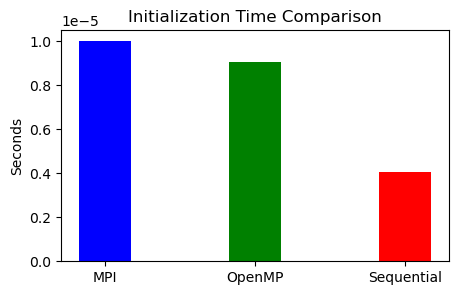

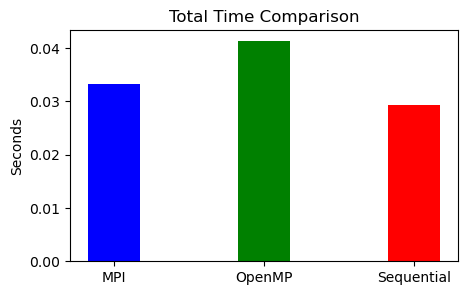

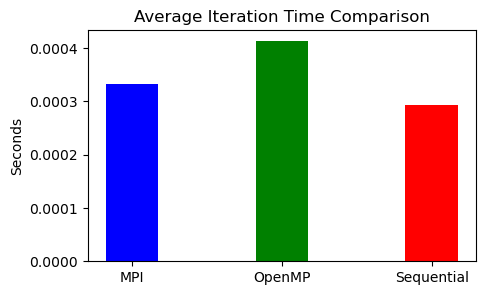

In [84]:
# Data setup
labels = ['MPI', 'OpenMP', 'Sequential']
init_times = [mpi_init, openmp_init, seq_init]
total_times = [mpi_total, openmp_total, seq_total]
avg_times = [mpi_avg, openmp_avg, seq_avg]
colors = ['b', 'g', 'r']
width = 0.35  # the width of the bars

# Initialization time bar chart
plt.figure(figsize=(5, 3))
plt.bar(labels, init_times, color=colors, width=width)
plt.title('Initialization Time Comparison')
plt.ylabel('Seconds')
plt.show()

# Total time bar chart
plt.figure(figsize=(5, 3))
plt.bar(labels, total_times, color=colors, width=width)
plt.title('Total Time Comparison')
plt.ylabel('Seconds')
plt.show()

# Average iteration time bar chart
plt.figure(figsize=(5, 3))
plt.bar(labels, avg_times, color=colors, width=width)
plt.title('Average Iteration Time Comparison')
plt.ylabel('Seconds')
plt.show()


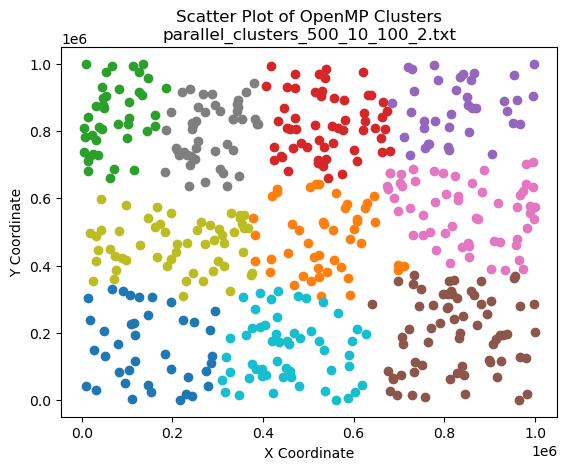

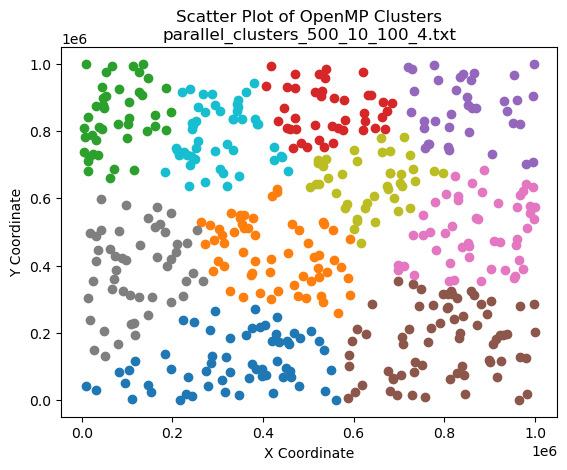

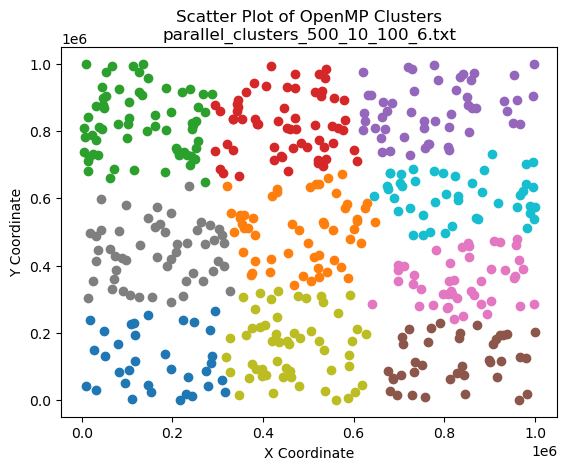

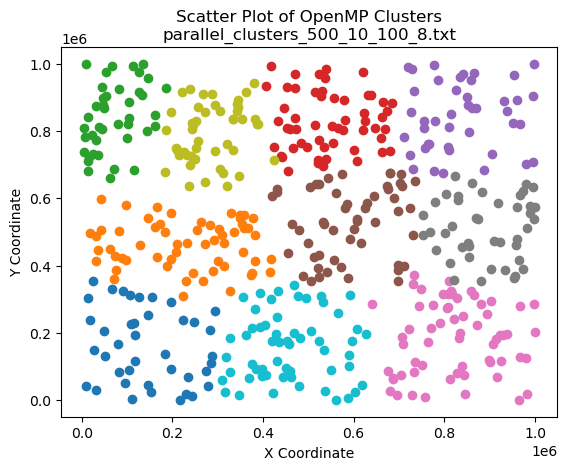

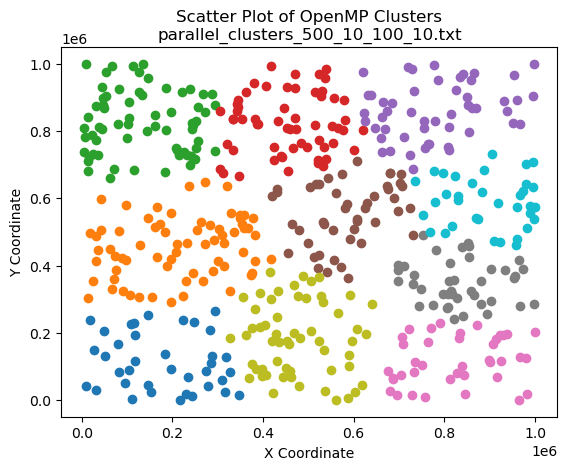

In [86]:
instances_dir = 'outputs/sanity_checks/'
parallel_instances = os.listdir(instances_dir)
for instance in parallel_instances:
    if 'parallel' not in instance:
        continue
    parts = instance.split('.')[0].split('_')
    file_number_of_points = int(parts[2])
    file_number_of_clusters = int(parts[3])
    file_number_of_iterations = int(parts[4])
    if file_number_of_points != number_of_points or file_number_of_clusters != number_of_clusters or file_number_of_iterations != number_of_iterations:
        continue
    data = pd.read_csv(instances_dir + instance)
    fig, ax = plt.subplots()
    for cluster in data['cluster_id'].unique():
        cluster_data = data[data['cluster_id'] == cluster]
        ax.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster}')
    # ax.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('Scatter Plot of OpenMP Clusters' + '\n' + instance)
    plt.show()

In [87]:
# number_of_points = 5000 
# number_of_clusters = 100
# number_of_iterations = 100
# number_of_threads_or_processes = 10

In [88]:
def parse_log_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    init_time = float(lines[0].strip().split()[-2])
    iters_times = [float(line.strip().split()[-2]) for line in lines[1:-2]]
    total_time = float(lines[-2].strip().split()[-2])
    avg_time = float(lines[-1].strip().split()[-2])
    
    return init_time, iters_times, total_time, avg_time

# File paths
number_of_points = 5000000
number_of_clusters = 100
number_of_iterations = 100
number_of_threads_or_processes = 10
address_prefix = 'outputs/method_comparison/'
mpi_file = f'{address_prefix}mpi_{number_of_points}_{number_of_clusters}_{number_of_iterations}_{number_of_threads_or_processes}.txt'
openmp_file = f'{address_prefix}openmp_{number_of_points}_{number_of_clusters}_{number_of_iterations}_{number_of_threads_or_processes}.txt'
sequential_file = f'{address_prefix}sequential_{number_of_points}_{number_of_clusters}_{number_of_iterations}.txt'

# Parsing the log files
mpi_init, mpi_iters, mpi_total, mpi_avg = parse_log_file(mpi_file)
openmp_init, openmp_iters, openmp_total, openmp_avg = parse_log_file(openmp_file)
seq_init, seq_iters, seq_total, seq_avg = parse_log_file(sequential_file)

In [89]:
openmp_init

1.21593e-05

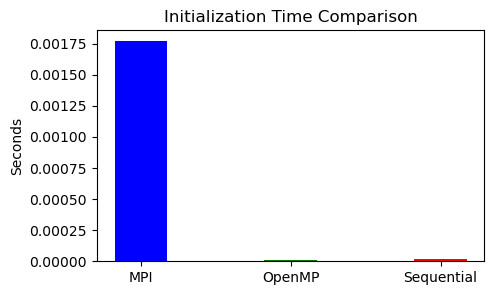

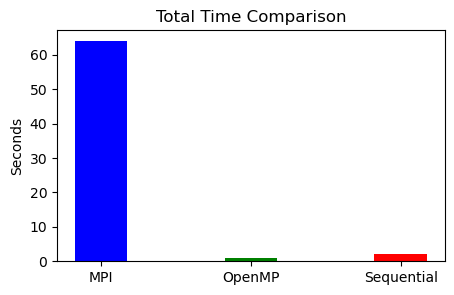

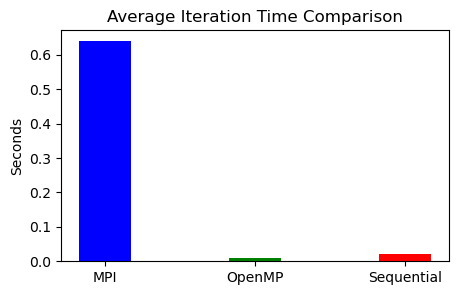

In [90]:
# Data setup
labels = ['MPI', 'OpenMP', 'Sequential']
init_times = [mpi_init, openmp_init, seq_init]
total_times = [mpi_total, openmp_total, seq_total]
avg_times = [mpi_avg, openmp_avg, seq_avg]
colors = ['b', 'g', 'r']
width = 0.35  # the width of the bars

# Initialization time bar chart
plt.figure(figsize=(5, 3))
plt.bar(labels, init_times, color=colors, width=width)
plt.title('Initialization Time Comparison')
plt.ylabel('Seconds')
plt.show()

# Total time bar chart
plt.figure(figsize=(5, 3))
plt.bar(labels, total_times, color=colors, width=width)
plt.title('Total Time Comparison')
plt.ylabel('Seconds')
plt.show()

# Average iteration time bar chart
plt.figure(figsize=(5, 3))
plt.bar(labels, avg_times, color=colors, width=width)
plt.title('Average Iteration Time Comparison')
plt.ylabel('Seconds')
plt.show()


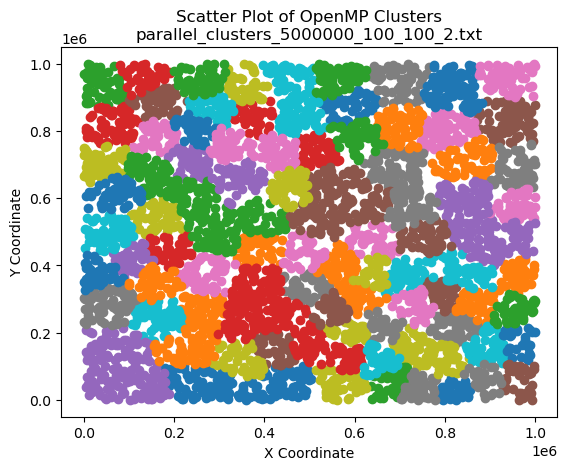

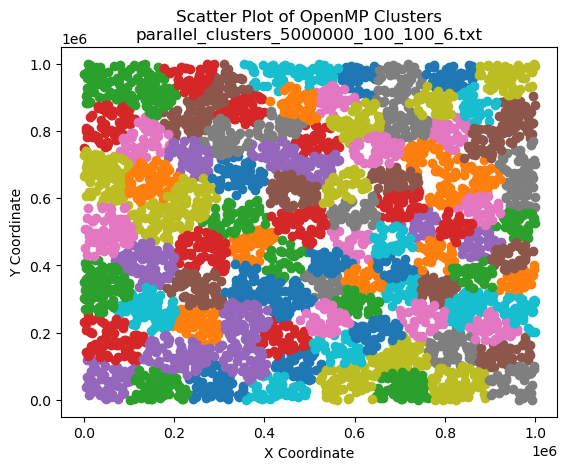

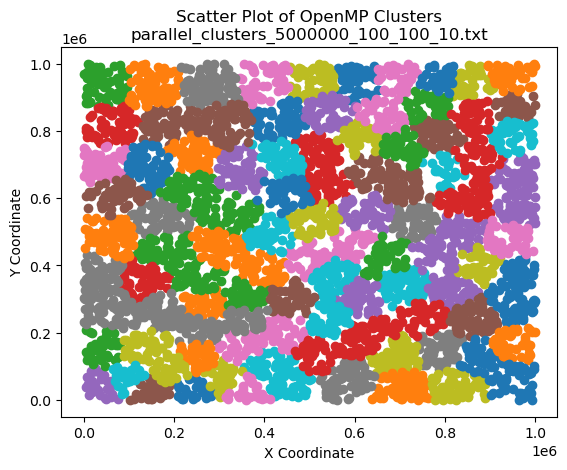

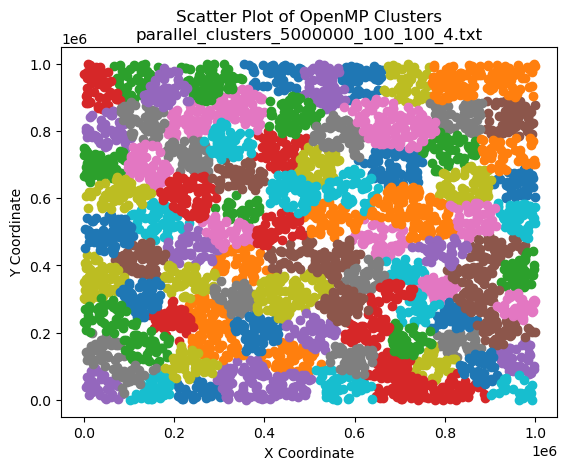

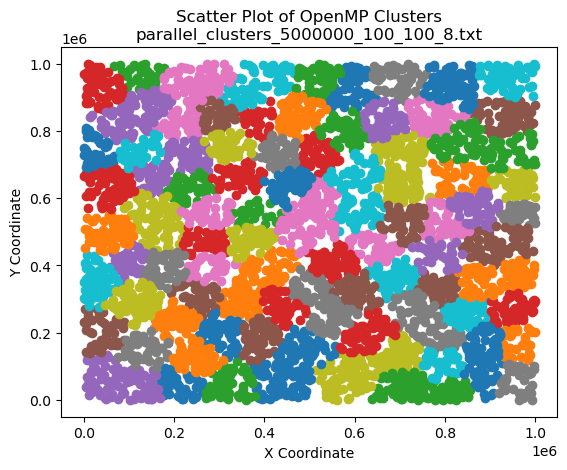

In [91]:
instances_dir = 'outputs/sanity_checks/'
parallel_instances = os.listdir(instances_dir)
for instance in parallel_instances:
    if 'parallel' not in instance:
        continue
    parts = instance.split('.')[0].split('_')
    file_number_of_points = int(parts[2])
    file_number_of_clusters = int(parts[3])
    file_number_of_iterations = int(parts[4])
    if file_number_of_points != number_of_points or file_number_of_clusters != number_of_clusters or file_number_of_iterations != number_of_iterations:
        continue
    data = pd.read_csv(instances_dir + instance)
    fig, ax = plt.subplots()
    for cluster in data['cluster_id'].unique():
        cluster_data = data[data['cluster_id'] == cluster]
        ax.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster}')
    # ax.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('Scatter Plot of OpenMP Clusters' + '\n' + instance)
    plt.show()

In [8]:
def parse_log_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    init_time = float(lines[0].strip().split()[-2])
    iters_times = [float(line.strip().split()[-2]) for line in lines[1:-2]]
    total_time = float(lines[-2].strip().split()[-2])
    avg_time = float(lines[-1].strip().split()[-2])
    
    return init_time, iters_times, total_time, avg_time

# File paths
prefix = 'outputs/method_comparison/'
model_names = ['mpi', 'openmp', 'sequential']
points = [5000, 50000, 500000, 5000000]
clusters = [100]
iterations = [100]
processors = [2, 4, 6, 8, 10]
processor_wise_data = {}

for model in model_names:
    for point in points:
        for cluster in clusters:
            for iteration in iterations:
                for processor in processors:
                    print('Experiment: ', model, point, cluster, iteration, processor)
                    file_name = prefix + model + '_{}_{}_{}_{}.txt'.format(point, cluster, iteration, processor)
                    if model == 'sequential':
                        processor = 1
                        file_name = prefix + model + '_{}_{}_{}.txt'.format(point, cluster, iteration)
                    init, iters, total, avg = parse_log_file(file_name)
                    print(f'{model} init: {init}, total: {total}, avg: {avg}')
                    print (iters)
                    processor_wise_data[(model, point, cluster, iteration, processor)] = (init, iters, total, avg)

Experiment:  mpi 5000 100 100 2
mpi init: 3e-06, total: 0.421857, avg: 0.004219
[0.002253, 0.00149, 0.001988, 0.001702, 0.012232, 0.005334, 0.003362, 0.005021, 0.004077, 0.002329, 0.000488, 0.001594, 0.001383, 0.008735, 0.002152, 0.003709, 0.00237, 0.010561, 0.0021, 0.001473, 0.001417, 0.013944, 0.001636, 0.001546, 0.001252, 0.010093, 0.002452, 0.001398, 0.021526, 0.008667, 0.002061, 0.001938, 0.0013, 0.013731, 0.00177, 0.003439, 0.009663, 0.001635, 0.002205, 0.009277, 0.00181, 0.004075, 0.001623, 0.002755, 0.001454, 0.020144, 0.003246, 0.000991, 0.003327, 0.00259, 0.001708, 0.008121, 0.001535, 0.001384, 0.001995, 0.001417, 0.010093, 0.00187, 0.002419, 0.001941, 0.002244, 0.003044, 0.00365, 0.001952, 0.002337, 0.001431, 0.001706, 0.001153, 0.007057, 0.002464, 0.001511, 0.002939, 0.001606, 0.00243, 0.008709, 0.017188, 0.004877, 0.00245, 0.001627, 0.001821, 0.002472, 0.001879, 0.00208, 0.001555, 0.001361, 0.002242, 0.007672, 0.002129, 0.002575, 0.020898, 0.00836, 0.002667, 0.002487, 0.00

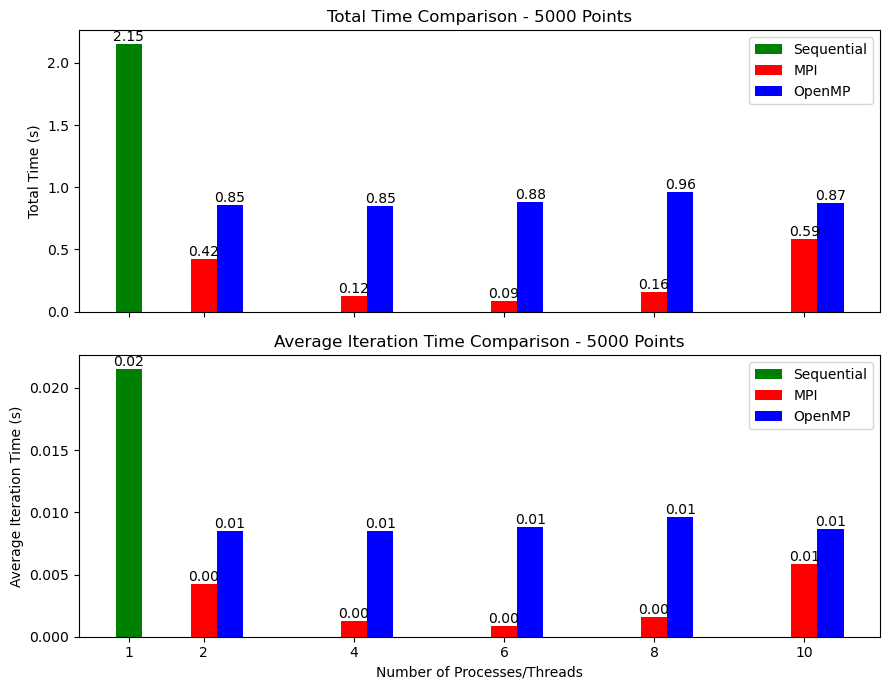

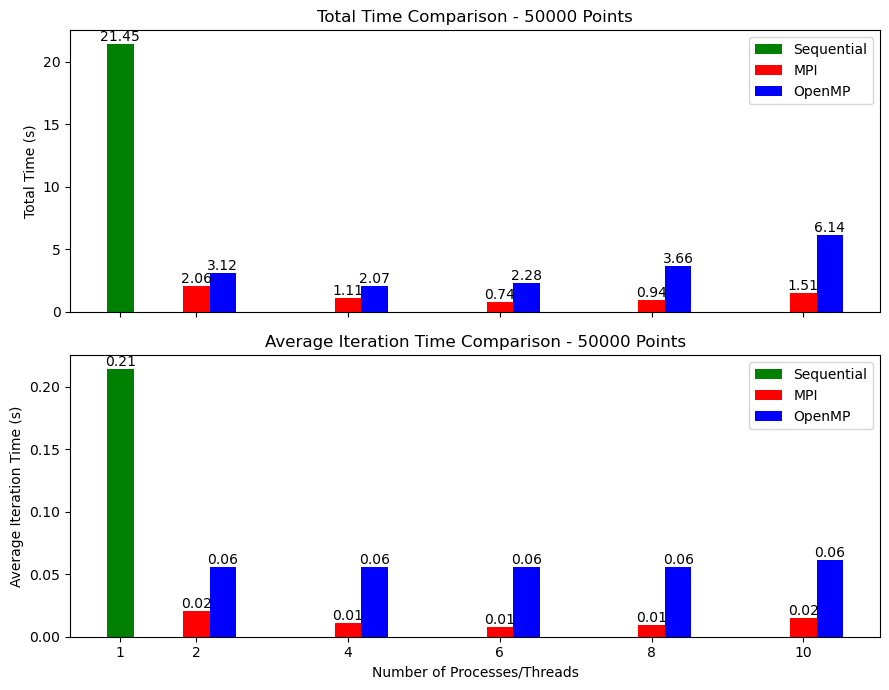

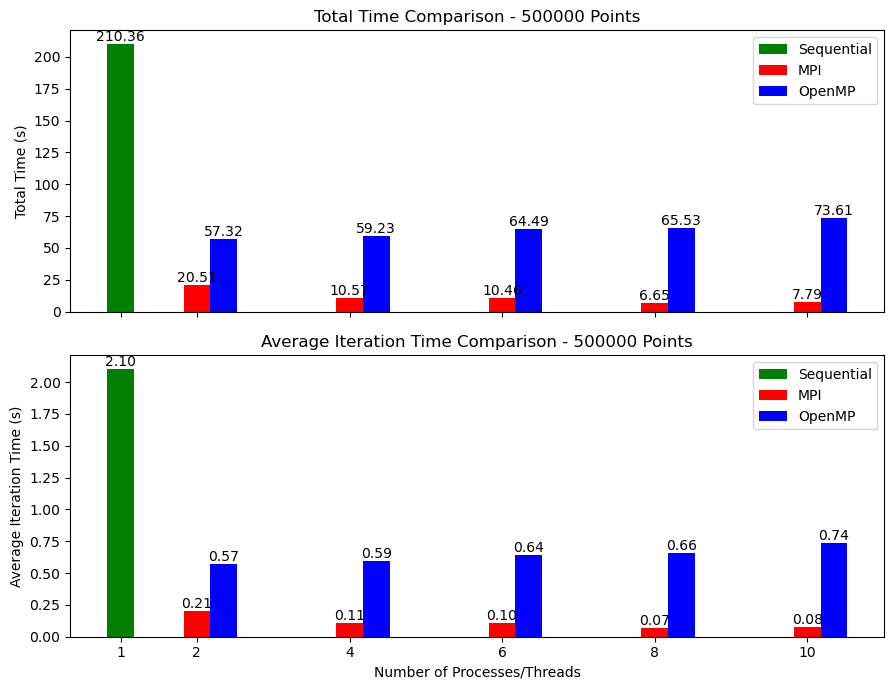

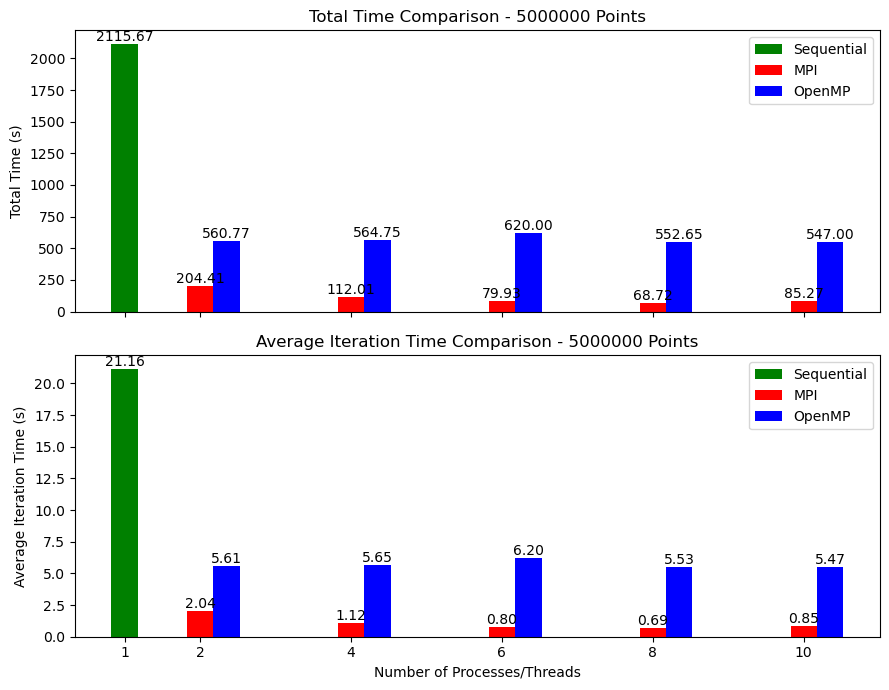

In [9]:
import matplotlib.pyplot as plt
import numpy as np

processors = [1, 2, 4, 6, 8, 10]
points = [5000, 50000, 500000, 5000000]
cluster_count = 100
iteration_count = 100

for point_count in points:
    # Prepare data for plotting
    total_times_mpi = []
    total_times_openmp = []
    total_times_sequential = []

    avg_times_mpi = []
    avg_times_openmp = []
    avg_times_sequential = []

    for processor in processors:
        if ('mpi', point_count, cluster_count, iteration_count, processor) in processor_wise_data:
            _, _, total, avg = processor_wise_data[('mpi', point_count, cluster_count, iteration_count, processor)]
            total_times_mpi.append(total)
            avg_times_mpi.append(avg)
        else:
            total_times_mpi.append(0)  # Or handle missing data differently
            avg_times_mpi.append(0)

        if ('openmp', point_count, cluster_count, iteration_count, processor) in processor_wise_data:
            _, _, total, avg = processor_wise_data[('openmp', point_count, cluster_count, iteration_count, processor)]
            total_times_openmp.append(total)
            avg_times_openmp.append(avg)
        else:
            total_times_openmp.append(0)
            avg_times_openmp.append(0)

        if ('sequential', point_count, cluster_count, iteration_count, processor) in processor_wise_data:
            _, _, total, avg = processor_wise_data[('sequential', point_count, cluster_count, iteration_count, processor)]
            total_times_sequential.append(total)
            avg_times_sequential.append(avg)
        else:
            total_times_sequential.append(0)
            avg_times_sequential.append(0)

    # Plotting the total time comparison
    fig, ax = plt.subplots(2, 1, figsize=(9, 7), sharex=True)

    # Only plot Sequential on the first processor count
    ax[0].bar(1, total_times_sequential[0], color='green', width=0.35, label='Sequential')
    ax[0].text(1, total_times_sequential[0], f"{total_times_sequential[0]:.2f}", ha='center', va='bottom')

    # Plot MPI and OpenMP for processor counts 2 to 10
    for i in range(1, len(processors)):
        ax[0].bar(processors[i], total_times_mpi[i], color='red', width=0.35, align='center', label='MPI' if i == 1 else None)
        ax[0].text(processors[i], total_times_mpi[i], f"{total_times_mpi[i]:.2f}", ha='center', va='bottom')
        ax[0].bar(processors[i] + 0.35, total_times_openmp[i], color='blue', width=0.35, align='center', label='OpenMP' if i == 1 else None)
        ax[0].text(processors[i] + 0.35, total_times_openmp[i], f"{total_times_openmp[i]:.2f}", ha='center', va='bottom')

    ax[0].set_ylabel('Total Time (s)')
    ax[0].set_title(f'Total Time Comparison - {point_count} Points')
    ax[0].legend()

    # Plotting the average time comparison
    ax[1].bar(1, avg_times_sequential[0], color='green', width=0.35, label='Sequential')
    ax[1].text(1, avg_times_sequential[0], f"{avg_times_sequential[0]:.2f}", ha='center', va='bottom')

    # Plot MPI and OpenMP for processor counts 2 to 10
    for i in range(1, len(processors)):
        ax[1].bar(processors[i], avg_times_mpi[i], color='red', width=0.35, align='center', label='MPI' if i == 1 else None)
        ax[1].text(processors[i], avg_times_mpi[i], f"{avg_times_mpi[i]:.2f}", ha='center', va='bottom')
        ax[1].bar(processors[i] + 0.35, avg_times_openmp[i], color='blue', width=0.35, align='center', label='OpenMP' if i == 1 else None)
        ax[1].text(processors[i] + 0.35, avg_times_openmp[i], f"{avg_times_openmp[i]:.2f}", ha='center', va='bottom')

    ax[1].set_xlabel('Number of Processes/Threads')
    ax[1].set_ylabel('Average Iteration Time (s)')
    ax[1].set_title(f'Average Iteration Time Comparison - {point_count} Points')
    ax[1].legend()

    plt.xticks(processors)  # Set the x ticks to show all processor counts
    plt.tight_layout()
    # save fig
    plt.savefig(f'outputs/figures/total_avg_time_comparison_{point_count}_points.png')
    plt.show()


In [15]:
def parse_sequential_or_parallel_memory_log(seq_filename):
    max_resident_set_size = None
    peak_memory_footprint = None
    
    with open(seq_filename, 'r') as f:
        lines = f.readlines()
        for line in lines:
            print("Processing line:", line.strip())  # Debugging statement
            if 'maximum resident set size' in line:
                try:
                    max_resident_set_size = int(line.split()[0])
                except ValueError:
                    print("Error: Unable to parse maximum resident set size")
            elif 'peak memory footprint' in line:
                try:
                    peak_memory_footprint = int(line.split()[0])
                except ValueError:
                    print("Error: Unable to parse peak memory footprint")
    
    return max_resident_set_size, peak_memory_footprint

# Example usage:
seq_max_resident_set_size, seq_peak_memory_footprint = parse_sequential_or_parallel_memory_log('sequential_memory_log.txt')
print("Sequential Maximum Resident Set Size:", seq_max_resident_set_size)
print("Sequential Peak Memory Footprint:", seq_peak_memory_footprint)

Processing line: 2.06 real         2.00 user         0.03 sys
Processing line: 2539520  maximum resident set size
Processing line: 0  average shared memory size
Processing line: 0  average unshared data size
Processing line: 0  average unshared stack size
Processing line: 259  page reclaims
Processing line: 39  page faults
Processing line: 0  swaps
Processing line: 0  block input operations
Processing line: 0  block output operations
Processing line: 0  messages sent
Processing line: 0  messages received
Processing line: 0  signals received
Processing line: 12  voluntary context switches
Processing line: 1148  involuntary context switches
Processing line: 25088745814  instructions retired
Processing line: 6318876645  cycles elapsed
Processing line: 1688320  peak memory footprint
Sequential Maximum Resident Set Size: 2539520
Sequential Peak Memory Footprint: 1688320


In [16]:
omp_max_resident_set_size, omp_peak_memory_footprint = parse_sequential_or_parallel_memory_log('openmp_memory_log.txt')
print("OpenMP Maximum Resident Set Size:", omp_max_resident_set_size)
print("OpenMP Peak Memory Footprint:", omp_peak_memory_footprint)

Processing line: 0.90 real         2.17 user         0.03 sys
Processing line: 2719744  maximum resident set size
Processing line: 0  average shared memory size
Processing line: 0  average unshared data size
Processing line: 0  average unshared stack size
Processing line: 244  page reclaims
Processing line: 34  page faults
Processing line: 0  swaps
Processing line: 0  block input operations
Processing line: 0  block output operations
Processing line: 0  messages sent
Processing line: 0  messages received
Processing line: 0  signals received
Processing line: 9  voluntary context switches
Processing line: 2278  involuntary context switches
Processing line: 25288171758  instructions retired
Processing line: 6633458047  cycles elapsed
Processing line: 1704640  peak memory footprint
OpenMP Maximum Resident Set Size: 2719744
OpenMP Peak Memory Footprint: 1704640


In [24]:
def parse_mpi_memory_log(seq_filename):
    max_resident_set_sizes = []
    peak_memory_footprints = []
    
    c = 0
    with open(seq_filename, 'r') as f:
        lines = f.readlines()
        for line in lines:
            print('c:', c, 'line:', line.strip())
            c += 1
            if 'maximum resident set size' in line:
                try:
                    max_resident_set_size = int(line.split()[0])
                except ValueError:
                    print("Error: Unable to parse maximum resident set size")
            elif 'peak memory footprint' in line:
                try:
                    peak_memory_footprint = int(line.split()[0])
                except ValueError:
                    print("Error: Unable to parse peak memory footprint")
            if c % 18 == 0:
                max_resident_set_sizes.append(max_resident_set_size)
                peak_memory_footprints.append(peak_memory_footprint)
                c = 0
    
    return max_resident_set_sizes, peak_memory_footprints

# Parse the provided data
max_resident_set_sizes, peak_memory_footprints = parse_mpi_memory_log('mpi_memory_log.txt')

# Output the lists
print("Maximum Resident Set Sizes:", max_resident_set_sizes)
print("Peak Memory Footprints:", peak_memory_footprints)

c: 0 line: 1.42 real         0.54 user         0.02 sys
c: 1 line: 9928704  maximum resident set size
c: 2 line: 0  average shared memory size
c: 3 line: 0  average unshared data size
c: 4 line: 0  average unshared stack size
c: 5 line: 844  page reclaims
c: 6 line: 21  page faults
c: 7 line: 0  swaps
c: 8 line: 0  block input operations
c: 9 line: 0  block output operations
c: 10 line: 14  messages sent
c: 11 line: 26  messages received
c: 12 line: 0  signals received
c: 13 line: 9  voluntary context switches
c: 14 line: 3019  involuntary context switches
c: 15 line: 8309860896  instructions retired
c: 16 line: 1602348445  cycles elapsed
c: 17 line: 4949440  peak memory footprint
c: 0 line: 1.42 real         0.54 user         0.02 sys
c: 1 line: 9961472  maximum resident set size
c: 2 line: 0  average shared memory size
c: 3 line: 0  average unshared data size
c: 4 line: 0  average unshared stack size
c: 5 line: 882  page reclaims
c: 6 line: 20  page faults
c: 7 line: 0  swaps
c: 8 li

In [25]:
avg_max_resident_set_size = sum(max_resident_set_sizes) / len(max_resident_set_sizes)
avg_peak_memory_footprint = sum(peak_memory_footprints) / len(peak_memory_footprints)

print("Average Maximum Resident Set Size:", avg_max_resident_set_size)
print("Average Peak Memory Footprint:", avg_peak_memory_footprint)

Average Maximum Resident Set Size: 9887744.0
Average Peak Memory Footprint: 5090348.8


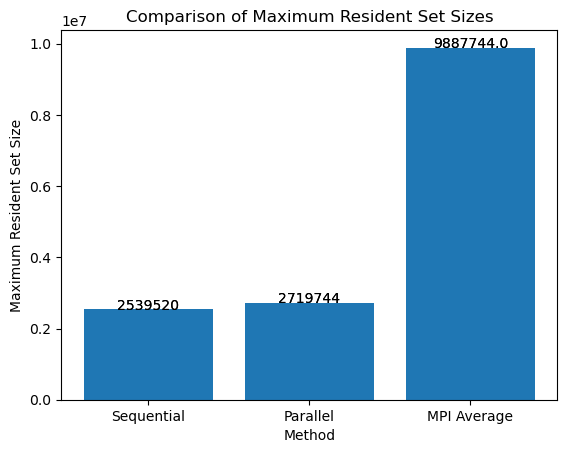

In [30]:
# Maximum Resident Set Sizes
labels = ['Sequential', 'Parallel', 'MPI Average']
values = [seq_max_resident_set_size, omp_max_resident_set_size, avg_max_resident_set_size]

plt.bar(labels, values)
for i in range(len(values)):
    plt.text(i, values[i], values[i], ha = 'center')
plt.xlabel('Method')
plt.ylabel('Maximum Resident Set Size')
plt.title('Comparison of Maximum Resident Set Sizes')
plt.show()